<h1 style ='color:magenta; text-align:right;text-transform:uppercase;'>Projet 02 Analyste de donnees:</h1>
<h1 style ='color:magenta; text-align:right;text-transform:uppercase;'>Présenté par Fumbah Elvis</h1>
<h2 style ='color:blue; text-align:right;text-transform:uppercase;'> <a href="https://github.com/fumbah/WeRateDogs_data_analyis_project"> View project on GitHub</a></h2>
<br>


<h2 style ='color:magenta;text-align:center; text-transform:uppercase;'>DEVELOPING INSIGHTS FROM WERATEDOGS ARCHIVES FROM 02/01/2015 TO 2010 8/1/20<br><br> 
<h2 style ='color:magenta; text-transform:uppercase;'>TABLE OF CONTENT</h2>
<ul>
<li style ='color:green; text-transform:uppercase;'><a href="#intro">INTRODUCTION</a></li>
<li style ='color:green; text-transform:uppercase;'><a href="#wrangling">DATA COLLECTION</a></li>
<li style ='color:green ; text-transform:uppercase;'><a href="#eva">DATA EVALUATION</a></li>
<li style ='color:green; text-transform:uppercase;'><a href="#conclusions">ConclusionS</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
from bs4 import BeautifulSoup
import csv
import io
import tweepy
import json
from timeit import default_timer as timer
%matplotlib inline
twitter_achive_enhanced_URL='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
image_predictions_CSV_URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

<a id='intro'></a>
<h2 style ='color:magenta;text-align:center; text-transform:uppercase;'>INTRODUCTION<br><br> </h2>
    
In this project, we analyzed WeRageDogs data to produce 03 useful information.
  WeRateDogs is a Twitter archive emailed to Udacity exclusively for learning.

This project involves collecting data through the tweeter API, processing the data and analyzing this dataset to produce useful insights into WeRageDogs Archive

We will fetch 03 datasets from 03 different sources: 02 of these datasets will be downloaded from the URL provided by Udacity, while the third dataset will be retrieved from the Tweeter Archive by querying their API .

<h2 style ='color:magenta;text-align:center; text-transform:uppercase;'>DATA COLLECTION<br><br> 

<h3 style = "color:magenta">Dataset 01:  twitter_achive_enhanced dataset :from the URL provided by Udacity</h3>

In [2]:
response = requests.get(twitter_achive_enhanced_URL)
response_content = response.content.decode('utf-8')
twitter_achive_enhanced_df = pd.read_csv(io.StringIO(response_content), sep = ",")
twitter_achive_enhanced_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

## let us save the data set for future use and verify that the operation was successfull

In [3]:
twitter_achive_enhanced_df.to_csv('twitter_achive_enhanced.csv')

In [4]:
twitter_achive_enhanced_df = pd.read_csv('twitter_achive_enhanced.csv', sep=',')
twitter_achive_enhanced_df.head()

Unnamed: 0            tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0           0  892420643555336193                    NaN                  NaN   
1           1  892177421306343426                    NaN                  NaN   
2           2  891815181378084864                    NaN                  NaN   
3           3  891689557279858688                    NaN                  NaN   
4           4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

<h3 style = "color:magenta">Dataset 02: image_predictions dataset :from the URL provided by Udacity</h3>

In [5]:
response = requests.get(image_predictions_CSV_URL)
response_content = response.content.decode('utf-8')
image_predictions_df = pd.read_csv(io.StringIO(response_content), sep = "\t")
image_predictions_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

<h3 style = "color:magenta">Dataset 03:  We will use the tweet_ids from the tweeter_enhanced dataset to query the tweeter API for number of favourites and Number of retweets of these existing tweets</h3>

## lets get the tweets ids from the enhanced dataset that we will loop through later when querying the tweeter API

In [6]:
tweet_ids = twitter_achive_enhanced_df.tweet_id.values
(tweet_ids)

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

<h3 style = "color:magenta">The below code will query the Tweeter API and save the results into tweet.json file : To run the code, please input your tweeter Api keys</h3>

consumer_key = 'Removed' 
consumer_secret = 'Removed' 
access_token = 'Removed' 
access_secret = 'Removed' 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

<h3 style = "color:magenta">we have equally saved the tweet_ids that failed for some Reason, we can requery the the Tweeter APi using these fail Tweeter_ids depending on thier reasons for failure</h3>

fails_dict_df = pd.DataFrame(enumerate(fails_dict.keys()))
fails_dict_df
fails_dict_df.to_csv('fail_tweets')

## let us load the tweet.json dataset to check the successfull operation of our APi call.

In [7]:
tweets_df = pd.read_json(r'tweet_json.txt', lines=True, encoding='utf-8-sig')
tweets_df.head() 

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorited  retweeted  possibly_sensitive  \
0  ...      False      False                 0.0   
1  ...      False      False                 0.0   
2  ...      False      False                 0.0   
3  ...      False      False                 0.0   
4  ...      False      False                 0.0   

  possibly_sensitive_appealable lang  retweeted_status  quoted_status_id  \
0                           0.0   en               NaN               NaN   
1                           0.0   en               NaN               NaN   
2                           0.0   en               NaN               NaN   
3                           0.0   en               NaN               NaN   
4                           0.0   en               NaN               NaN   

  quoted_status_id_str  quoted_status_permalink  quoted_status  
0                  NaN                      NaN            NaN  
1                  NaN                      NaN            NaN  
2                  NaN                      NaN            NaN  
3                  NaN                      NaN            NaN  
4                  NaN                      NaN            NaN  

[5 rows x 32 columns]

## we have successful collected and loaded the 03 datasets from the 03 different sources and we will proceed with data assements

<h2 style ='color:magenta;text-align:center; text-transform:uppercase;'>Data Assesment<br><br> 

<h3 style = "color:magenta">visual assesment</h3>

## let visualise the twitter_achive_enhanced data set

In [8]:
twitter_achive_enhanced_df.shape

(2356, 18)

In [9]:
pd.options.display.max_rows = 5000
twitter_achive_enhanced_df.head(20)

Unnamed: 0            tweet_id  in_reply_to_status_id  \
0            0  892420643555336193                    NaN   
1            1  892177421306343426                    NaN   
2            2  891815181378084864                    NaN   
3            3  891689557279858688                    NaN   
4            4  891327558926688256                    NaN   
5            5  891087950875897856                    NaN   
6            6  890971913173991426                    NaN   
7            7  890729181411237888                    NaN   
8            8  890609185150312448                    NaN   
9            9  890240255349198849                    NaN   
10          10  890006608113172480                    NaN   
11          11  889880896479866881                    NaN   
12          12  889665388333682689                    NaN   
13          13  889638837579907072                    NaN   
14          14  889531135344209921                    NaN   
15          15  889278841981685760                    NaN   
16          16  888917238123831296                    NaN   
17          17  888804989199671297                    NaN   
18          18  888554962724278272                    NaN   
19          19  888202515573088257                    NaN   

    in_reply_to_user_id                  timestamp  \
0                   NaN  2017-08-01 16:23:56 +0000   
1                   NaN  2017-08-01 00:17:27 +0000   
2                   NaN  2017-07-31 00:18:03 +0000   
3                   NaN  2017-07-30 15:58:51 +0000   
4                   NaN  2017-07-29 16:00:24 +0000   
5                   NaN  2017-07-29 00:08:17 +0000   
6                   NaN  2017-07-28 16:27:12 +0000   
7                   NaN  2017-07-28 00:22:40 +0000   
8                   NaN  2017-07-27 16:25:51 +0000   
9                   NaN  2017-07-26 15:59:51 +0000   
10                  NaN  2017-07-26 00:31:25 +0000   
11                  NaN  2017-07-25 16:11:53 +0000   
12                  NaN  2017-07-25 01:55:32 +0000   
13                  NaN  2017-07-25 00:10:02 +0000   
14                  NaN  2017-07-24 17:02:04 +0000   
15                  NaN  2017-07-24 00:19:32 +0000   
16                  NaN  2017-07-23 00:22:39 +0000   
17                  NaN  2017-07-22 16:56:37 +0000   
18                  NaN  2017-07-22 00:23:06 +0000   
19                  NaN  2017-07-21 01:02:36 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
0   This is Phineas. He's a mystical boy. Only eve...                  NaN   
1   This is Tilly. She's just checking pup on you....                  NaN   
2   This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3   This is Darla. She commenced a snooze mid meal...                  NaN   

In [10]:
df = twitter_achive_enhanced_df[twitter_achive_enhanced_df['name']=='None']
df[['tweet_id','text', 'name','puppo','doggo']]

tweet_id                                               text  \
5     891087950875897856  Here we have a majestic great white breaching ...   
7     890729181411237888  When you watch your owner call another dog a g...   
12    889665388333682689  Here's a puppo that seems to be on the fence a...   
24    887343217045368832  You may not have known you needed to see this ...   
25    887101392804085760  This... is a Jubilant Antarctic House Bear. We...   
30    886267009285017600  @NonWhiteHat @MayhewMayhem omg hello tanner yo...   
32    886054160059072513  RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...   
35    885518971528720385  I have a new hero and his name is Howard. 14/1...   
37    885167619883638784  Here we have a corgi undercover as a malamute....   
41    884441805382717440  I present to you, Pup in Hat. Pup in Hat is gr...   
42    884247878851493888  OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...   
47    883117836046086144  Please only send dogs. We don't rate mechanics...   
55    881633300179243008  @roushfenway These are good dogs but 17/10 is ...   
59    880872448815771648  Ugh not again. We only rate dogs. Please don't...   
62    880095782870896641  Please don't send in photos without dogs in th...   
64    879674319642796034                    @RealKentMurphy 14/10 confirmed   
72    878604707211726852  Martha is stunning how h*ckin dare you. 13/10 ...   
78    877611172832227328  RT @rachel2195: @dog_rates the boyfriend and h...   
83    876537666061221889  I can say with the pupmost confidence that the...   
88    875097192612077568  You'll get your package when that precious man...   
89    875021211251597312  Guys please stop sending pictures without any ...   
93    874057562936811520  I can't believe this keeps happening. This, is...   
96    873580283840344065  We usually don't rate Deck-bound Saskatoon Bla...   
99    872967104147763200  Here's a very large dog. He has a date later. ...   
100   872820683541237760  Here are my favorite #dogsatpollingstations \n...   
101   872668790621863937  RT @loganamnosis: Penelope here is doing me qu...   
103   872486979161796608  We. Only. Rate. Dogs. Do not send in other thi...   
110   871102520638267392  Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH   
112   870804317367881728  Real funny guys. Sending in a pic without a do...   
113   870726314365509632  @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...   
125   868622495443632128  Here's a h*ckin peaceful boy. Unbothered by th...   
127   867900495410671616  Unbelievable. We only rate dogs. Please don't ...   
130   867072653475098625  RT @rachaeleasler: these @dog_rates hats are 1...   
131   867051520902168576  Oh my this spooked me up. We only rate dogs, n...   
133   866720684873056260  He was providing for his family 13/10 how dare...   
137   866094527597207552  RT @dog_rates: Here's a pupper before and afte...   
141   864873206498414592  We only rate dogs. Please don't send in Jesus....   
148   863427515083354112  @Jack_Septic_Eye I'd need a few more pics to p...   
149   863079547188785154  Ladies and gentlemen... I found Pipsy. He may ...   
154   862096992088072192  We only rate dogs. Please don't send perfectly...   
155   861769973181624320  RT @dog_rates: "Good afternoon class today we'...   
157   861288531465048066  HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...   
160   860924035999428608  RT @tallylott: h*ckin adorable promposal. 13/1...   
164   860184849394610176  Here we have perhaps the wisest dog of all. Ab...   
165   860177593139703809  RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...   
168   859607811541651456  Sorry for the lack of posts today. I came home...   
170   859074603037188101  Here we have an exotic dog. Good at ukulele. F...   
172   858843525470990336  I have stumbled puppon a doggo painting party....   
177   857393404942143489  Instead of the usual nightly dog rate, I'm sha...   
179   857214891891077121                       @Marc_IRL pixelated

<h3 style = "color:magenta">Problems Detected</h3>
In odre to be able to fetch the users dog's name, the text of the user have to begin with this is, and the next word will be the dogs name, meaning the dog can not have two names, text must be wrtten in enlish, and text must start with this is , by convention, equally, for the dog stage to be fetched, it must have to be spelled correctly and included in the text.  

A visual assement of the Tweeter enhanced dataset will show alots of problems with the gotten dataset at the level of the dogs names and its stages.. some of these problems include:

<h3 style = "color:Red">Problem 1</h3>
# The tweet with id 666049248165822465	Here we have a 1949 1st generation vulpix. has a wrong information on name field
# The text field coontains the dog name but it was not fetch correctly.

<h3 style = "color:Red">Problem 2</h3>
the dog name of the tweet_id:( 889665388333682689 	of text Here's a puppo that seems to be on the fence a...)
has not been correctly fetch.

 <h3 style = "color:Red">Problem 3</h3>
 # the tweet with id 885518971528720385 (	I have a new hero and his name is Howard. 14/1...	 ) has wrong information on name field 
# the name is present but was not    fetch

 <h3 style = "color:Red">Problem 4</h3>
the tweet with id 878604707211726852	(Martha is stunning how h*ckin dare you. 13/10 ...	None.) also has wrong information on date name field  but it was not fetch

 <h3 style = "color:Red">Problem 5</h3>
The tweet with id  858843525470990336	(I have stumbled puppon a doggo painting party....	) has wrong information on name field but was not fetch correctly.

 <h3 style = "color:Red">Problem 6</h3>
the tweet with id 824325613288833024	(Retweet the h*ck out of this 13/10 pupper #Bel...	 ) has wrong information on the dog stage column and also on the name column.

 <h3 style = "color:Red">Problem 7</h3>
 the tweet with id 841439858740625411	(Here we have some incredible doggos for #K9Vet... ) has wrong information on the dog stage column and also on the name column. 

 <h3 style = "color:Red">Problem 8</h3>
the tweet with id 752568224206688256 (Here are three doggos completely misjudging an...) has wrong information on the stage of the dog because of a spelling error.

## let visualise the image_predictions data set

In [11]:
image_predictions_df.shape

(2075, 12)

In [12]:
image_predictions_df.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

## from the visual perspective, there seems to be no issues with this image_predictions data set

In [13]:
import os
dir = os.getcwd()
print(dir)

C:\Users\fumbah\Documents\ALX_PROJECTS\WeRateDogs_data_analyis_project


## let us visualise the tweets data set

In [14]:
tweets_df.shape

(2327, 32)

In [15]:
tweets_df.head(10)

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
5 2017-07-29 00:08:17+00:00  891087950875897856  891087950875897856   
6 2017-07-28 16:27:12+00:00  890971913173991426  890971913173991424   
7 2017-07-28 00:22:40+00:00  890729181411237888  890729181411237888   
8 2017-07-27 16:25:51+00:00  890609185150312448  890609185150312448   
9 2017-07-26 15:59:51+00:00  890240255349198849  890240255349198848   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   
5  Here we have a majestic great white breaching ...      False   
6  Meet Jax. He enjoys ice cream so much he gets ...      False   
7  When you watch your owner call another dog a g...      False   
8  This is Zoey. She doesn't want to be one of th...      False   
9  This is Cassie. She is a college pup. Studying...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
5           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
6           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
7           [0, 118]  {'hashtags': [], 'symbols': [], 'user_mentions...   
8           [0, 122]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
9           [0, 133]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   
5  {'media': [{'id': 891087942176911360, 'id_str'...   
6  {'media': [{'id': 890971906207338496, 'id_str'...   
7  {'media': [{'id': 890729118844600320, 'id_str'...   
8  {'media': [{'id': 890609177319665665, 'id_str'...   
9  {'media': [{'id': 890240245463175168, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   
5  <a href="http://twitter.com/download/iphone" r...                    NaN   
6  <a href="http://twitter.com/download/iphone" r...                    NaN   
7  <a href="http://twitter.com/download/iphone" r...                    NaN   
8  <a href="http://twitter.com/download/iphone" r...                    NaN   
9  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorited  retweeted  possibly_sensitive  \
0  ...      False      False                 0.0   
1  ...      False      False                 0.0   
2  ...      False      False

## Apparently, there seem to be no issues with tweets_df from the visual perspective

<h3 style = "color:magenta">Programmatic assesment</h3>

# let us programmatically evaluate the twitter_achive_enhanced data
# 1-duplicates
# 2-null entries
# 3-outliers
# 4-Incorrect entries

In [16]:
twitter_achive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2356 non-null   int64  
 1   tweet_id                    2356 non-null   int64  
 2   in_reply_to_status_id       78 non-null     float64
 3   in_reply_to_user_id         78 non-null     float64
 4   timestamp                   2356 non-null   object 
 5   source                      2356 non-null   object 
 6   text                        2356 non-null   object 
 7   retweeted_status_id         181 non-null    float64
 8   retweeted_status_user_id    181 non-null    float64
 9   retweeted_status_timestamp  181 non-null    object 
 10  expanded_urls               2297 non-null   object 
 11  rating_numerator            2356 non-null   int64  
 12  rating_denominator          2356 non-null   int64  
 13  name                        2356 

In [17]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

<h3 style = "color:magenta">Probleme 09</h3>
information from the twitter_achive_enhanced dataframe shows:
the date format to be wrong

In [19]:
twitter_achive_enhanced_df['tweet_id'].duplicated().count()

2356

In [20]:
twitter_achive_enhanced_df.isnull().count()

Unnamed: 0                    2356
tweet_id                      2356
in_reply_to_status_id         2356
in_reply_to_user_id           2356
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id           2356
retweeted_status_user_id      2356
retweeted_status_timestamp    2356
expanded_urls                 2356
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [21]:
tweets_df.isnull().count()

created_at                       2327
id                               2327
id_str                           2327
full_text                        2327
truncated                        2327
display_text_range               2327
entities                         2327
extended_entities                2327
source                           2327
in_reply_to_status_id            2327
in_reply_to_status_id_str        2327
in_reply_to_user_id              2327
in_reply_to_user_id_str          2327
in_reply_to_screen_name          2327
user                             2327
geo                              2327
coordinates                      2327
place                            2327
contributors                     2327
is_quote_status                  2327
retweet_count                    2327
favorite_count                   2327
favorited                        2327
retweeted                        2327
possibly_sensitive               2327
possibly_sensitive_appealable    2327
lang        

tweets_df.columns

<AxesSubplot:>

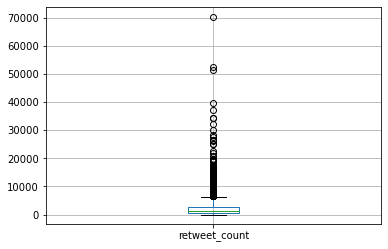

In [22]:
tweets_df[['retweet_count']].boxplot()

<AxesSubplot:>

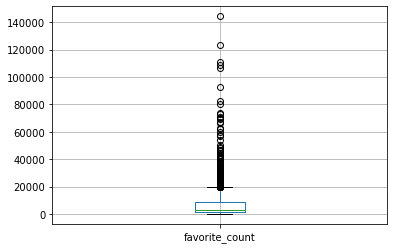

In [23]:
tweets_df[['favorite_count']].boxplot()

<AxesSubplot:ylabel='Frequency'>

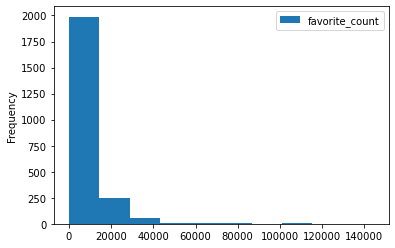

In [24]:
tweets_df[['favorite_count']].plot(kind='hist')

<h3 style = "color:magenta">Probleme 10</h3>
There is possibly one outliers in retweet_count
One outlier in favorite_count at about 140,000 
the histogram further shows the presence of outlier in the data as most of the data is concertrated between 0 and 120000

<br><br> 
<h2 style ='color:magenta;text-align:center; text-transform:uppercase;'>Data cleaning<br><br>

To start to clean this data set, we are going to merge the 03 dataset into one table, but first, let us rename the id column of the tweets_df to tweet_id

In [25]:
tweets_df = tweets_df[['id','retweet_count', 'favorite_count']].rename(columns = {'id':'tweet_id'})
tweets_df.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           6969           33696
1  892177421306343426           5272           29218
2  891815181378084864           3464           21974
3  891689557279858688           7191           36779
4  891327558926688256           7715           35180

let us merge the dataframes together to get whole dataset from which we can make our evaluations and predictions

In [26]:
df = pd.merge(image_predictions_df, tweets_df, on='tweet_id', how='inner')
df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  retweet_count  \
0  0.156665    True    Shetland_sheepdog  0.061428    True            419   
1  0.074192    True  Rhodesian_ridgeback  0.072010    True             39   
2  0.138584    True           bloodhound  0.116197    True             36   
3  0.360687    True   miniature_pinscher  0.222752    True            115   
4  0.243682    True             Doberman  0.154629    True             36   

   favorite_count  
0            2281  
1             112  
2             100  
3             246  
4              88

In [27]:
tweeter_final_df =  pd.merge(df, twitter_achive_enhanced_df, on='tweet_id', how='inner')
pd.options.display.max_columns = 31
tweeter_final_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  retweet_count  \
0  0.156665    True    Shetland_sheepdog  0.061428    True            419   
1  0.074192    True  Rhodesian_ridgeback  0.072010    True             39   
2  0.138584    True           bloodhound  0.116197    True             36   
3  0.360687    True   miniature_pinscher  0.222752    True            115   
4  0.243682    True             Doberman  0.154629    True             36   

   favorite_count  Unnamed: 0  in_reply_to_status_id  in_reply_to_user_id  \
0            2281        2355                    NaN                  NaN   
1             112        2354                    NaN                  NaN   
2             100        2353                    NaN                  NaN   
3             246        2352                    NaN                  NaN   
4              88        2351                    NaN                  NaN   

                   timestamp  \
0  2015-11-15 22:32:08 +0000   
1  2015-11-15 23:05:30 +0000   
2  2015-11-15 23:21:54 +0000   
3  2015-11-16 00:04:52 +0000   
4  2015-11-16 00:24:50 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  Here we have a Japanese Irish Setter. Lost eye...                  NaN   
1  This is a western brown Mitsubishi terrier. Up...                  NaN   
2  Here is a very happy pup. Big fan of well-main...                  NaN   
3  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
4  Here we have a 1949 1st generation vulpix. Enj...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/666020888...                 8   
1  https://twitter.com/dog_rates/status/666029285...                 7   
2  https://twitter.com/dog_rates/status/666033412...                 9   
3  https://twitter.com/dog_rates/status/666044226...                 6   
4  https://twitter.com/dog_rates/status/666049248...                 5   

   rating_denominator  name doggo floofer pupper puppo  
0                  10  None  None    None   None  None  
1                  10     a  None    None   None  None  
2                  10     a  None    None   None  None  
3                  10     a  None    None   None  None  
4                  10  None  None    None   None  None

Describe Data
We can now look at the shape of the data.

In [28]:
tweeter_final_df.shape

(2057, 31)

We can take a look at the first 100 rows of data 

In [29]:
tweeter_final_df.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  retweet_count  \
0  0.156665    True    Shetland_sheepdog  0.061428    True            419   
1  0.074192    True  Rhodesian_ridgeback  0.072010    True             39   
2  0.138584    True           bloodhound  0.116197    True             36   

   favorite_count  Unnamed: 0  in_reply_to_status_id  in_reply_to_user_id  \
0            2281        2355                    NaN                  NaN   
1             112        2354                    NaN                  NaN   
2             100        2353                    NaN                  NaN   

                   timestamp  \
0  2015-11-15 22:32:08 +0000   
1  2015-11-15 23:05:30 +0000   
2  2015-11-15 23:21:54 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  Here we have a Japanese Irish Setter. Lost eye...                  NaN   
1  This is a western brown Mitsubishi terrier. Up...                  NaN   
2  Here is a very happy pup. Big fan of well-main...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/666020888...                 8   
1  https://twitter.com/dog_rates/status/666029285...                 7   
2  https://twitter.com/dog_rates/status/666033412...                 9   

   rating_denominator  name doggo floofer pupper puppo  
0                  10  None  None    None   None  None  
1                  10     a  None    None   None  None  
2                  10     a  None    None   None  None

<h3 style = "color:magenta">Let us remove tweets that are retweets</h3>

but before, let us archieve the combine dataset

In [30]:
tweeter_final_Archieve = tweeter_final_df.to_csv('tweeter_final_Archieve.csv', index=False)

with the dataset saved, let us continue with the cleaning, let glance through the columns names

In [31]:
tweeter_final_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count', 'Unnamed: 0', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [50]:
df = tweeter_final_df[tweeter_final_df['retweeted_status_id'].isnull() == False]
df

tweet_id                                            jpg_url  \
94    667550882905632768    https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg   
95    667550904950915073    https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg   
1036  711998809858043904  https://pbs.twimg.com/tweet_video_thumb/CeGGkW...   
1296  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1313  754874841593970688    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1328  757597904299253760    https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg   
1331  757729163776290825    https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   
1343  759159934323924993    https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
1360  761371037149827077  https://pbs.twimg.com/tweet_video_thumb/CeBym7...   
1364  761750502866649088    https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg   
1383  766078092750233600    https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg   
1403  770093767776997377    https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg   
1412  771171053431250945    https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg   
1422  772615324260794368    https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg   
1441  775898661951791106    https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg   
1448  776819012571455488    https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg   
1451  777641927919427584    https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg   
1458  778396591732486144    https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg   
1469  780476555013349377  https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...   
1470  780496263422808064    https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   
1481  782021823840026624    https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg   
1489  783347506784731136    https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg   
1504  786036967502913536    https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg   
1516  788070120937619456    https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg   
1532  790723298204217344    https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg   
1535  791026214425268224    https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg   
1558  793614319594401792    https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg   
1563  794355576146903043    https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg   
1565  794983741416415232    https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg   
1573  796177847564038144    https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg   
1582  798340744599797760    https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg   
1583  798628517273620480    https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   
1584  798644042770751489    https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg   
1585  798665375516884993    https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg   
1586  798673117451325440    https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg   
1587  798694562394996736    https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg   
1588  798697898615730177    https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg   
1595  799774291445383169    https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg   
1599  800443802682937345    https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg   
1612  802624713319034886    https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg   
1617  803692223237865472    https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg   
1620  804413760345620481    https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg   
1627  805958939288408065    https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg   
1629  806242860592926720    https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg   
1633  807059379405148160    https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg   
1638  808134635716833280    https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg   
1645  809808892968534016    https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg   
1676  813944609378369540    https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg   
1686  816014286006976512    https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg   
1692  816829038950027264    https://pbs.twimg.com/media/CvoBPWRWgA

In [51]:
tweeter_final_df[tweeter_final_df['retweeted_status_id'].isnull() == False].index

Int64Index([  94,   95, 1036, 1296, 1313, 1328, 1331, 1343, 1360, 1364, 1383,
            1403, 1412, 1422, 1441, 1448, 1451, 1458, 1469, 1470, 1481, 1489,
            1504, 1516, 1532, 1535, 1558, 1563, 1565, 1573, 1582, 1583, 1584,
            1585, 1586, 1587, 1588, 1595, 1599, 1612, 1617, 1620, 1627, 1629,
            1633, 1638, 1645, 1676, 1686, 1692, 1696, 1705, 1710, 1711, 1720,
            1729, 1735, 1739, 1748, 1781, 1795, 1796, 1802, 1834, 1837, 1848,
            1875, 1926, 1949, 1989, 2024],
           dtype='int64')

In [52]:
tweeter_final_df.drop(tweeter_final_df[tweeter_final_df['retweeted_status_id'].isnull() == False].index, inplace=True)

In [53]:
tweeter_final_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  retweet_count  \
0  0.156665    True    Shetland_sheepdog  0.061428    True            419   
1  0.074192    True  Rhodesian_ridgeback  0.072010    True             39   
2  0.138584    True           bloodhound  0.116197    True             36   
3  0.360687    True   miniature_pinscher  0.222752    True            115   
4  0.243682    True             Doberman  0.154629    True             36   

   favorite_count  Unnamed: 0  in_reply_to_status_id  in_reply_to_user_id  \
0            2281        2355                    NaN                  NaN   
1             112        2354                    NaN                  NaN   
2             100        2353                    NaN                  NaN   
3             246        2352                    NaN                  NaN   
4              88        2351                    NaN                  NaN   

                   timestamp  \
0  2015-11-15 22:32:08 +0000   
1  2015-11-15 23:05:30 +0000   
2  2015-11-15 23:21:54 +0000   
3  2015-11-16 00:04:52 +0000   
4  2015-11-16 00:24:50 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  Here we have a Japanese Irish Setter. Lost eye...                  NaN   
1  This is a western brown Mitsubishi terrier. Up...                  NaN   
2  Here is a very happy pup. Big fan of well-main...                  NaN   
3  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
4  Here we have a 1949 1st generation vulpix. Enj...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/666020888...                 8   
1  https://twitter.com/dog_rates/status/666029285...                 7   
2  https://twitter.com/dog_rates/status/666033412...                 9   
3  https://twitter.com/dog_rates/status/666044226...                 6   
4  https://twitter.com/dog_rates/status/666049248...                 5   

   rating_denominator  name doggo floofer pupper puppo  
0                  10  None  None    None   None  None  
1                  10     a  None    None   None  None  
2                  10     a  None    None   None  None  
3                  10     a  None    None   None  None  
4                  10  None  None    None   None  None

<h3 style = "color:magenta">Let us remove tweets which are not dogs</h3>

we are going to use the p1_dog, p2_dog, p3_dog to retrieve indices of rows that are false in all of the predictions

In [54]:
tweeter_final_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  retweet_count  \
0  0.156665    True    Shetland_sheepdog  0.061428    True            419   
1  0.074192    True  Rhodesian_ridgeback  0.072010    True             39   
2  0.138584    True           bloodhound  0.116197    True             36   
3  0.360687    True   miniature_pinscher  0.222752    True            115   
4  0.243682    True             Doberman  0.154629    True             36   

   favorite_count  Unnamed: 0  in_reply_to_status_id  in_reply_to_user_id  \
0            2281        2355                    NaN                  NaN   
1             112        2354                    NaN                  NaN   
2             100        2353                    NaN                  NaN   
3             246        2352                    NaN                  NaN   
4              88        2351                    NaN                  NaN   

                   timestamp  \
0  2015-11-15 22:32:08 +0000   
1  2015-11-15 23:05:30 +0000   
2  2015-11-15 23:21:54 +0000   
3  2015-11-16 00:04:52 +0000   
4  2015-11-16 00:24:50 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  Here we have a Japanese Irish Setter. Lost eye...                  NaN   
1  This is a western brown Mitsubishi terrier. Up...                  NaN   
2  Here is a very happy pup. Big fan of well-main...                  NaN   
3  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
4  Here we have a 1949 1st generation vulpix. Enj...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/666020888...                 8   
1  https://twitter.com/dog_rates/status/666029285...                 7   
2  https://twitter.com/dog_rates/status/666033412...                 9   
3  https://twitter.com/dog_rates/status/666044226...                 6   
4  https://twitter.com/dog_rates/status/666049248...                 5   

   rating_denominator  name doggo floofer pupper puppo  
0                  10  None  None    None   None  None  
1                  10     a  None    None   None  None  
2                  10     a  None    None   None  None  
3                  10     a  None    None   None  None  
4                  10  None  None    None   None  None

In [ ]:
tweeter_final_df.drop(tweeter_final_df[tweeter_final_df['retweeted_status_id'].isnull() == False].index, inplace=True)

In [65]:
tweeter_final_df.drop(tweeter_final_df[(tweeter_final_df['p1_dog']==False) & 
                 (tweeter_final_df['p2_dog']==False) & 
                 (tweeter_final_df['p3_dog']==False)].index, inplace=True)

<h3 style = "color:magenta">let us drop columns that will not be necessary</h3>

In [68]:
tweeter_final_df.drop(['Unnamed: 0','expanded_urls',
                       'in_reply_to_status_id', 'retweeted_status_timestamp',
                       'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'], inplace=True, axis=1)

In [140]:
tweeter_final_df[tweeter_final_df['name'] =='None'][['tweet_id','text','name', 'doggo', 'pupper', 'puppo', 'floofer']]

tweet_id                                               text  \
0     666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   
11    666071193221509120  Here we have a northern speckled Rhododendron....   
12    666073100786774016  Let's hope this flight isn't Malaysian (lol). ...   
13    666082916733198337  Here we have a well-established sunblockerspan...   
14    666094000022159362  This appears to be a Mongolian Presbyterian mi...   
15    666099513787052032  Can stand on stump for what seems like a while...   
16    666102155909144576  Oh my. Here you are seeing an Adobe Setter giv...   
19    666273097616637952     Can take selfies 11/10 https://t.co/ws2AMaNwPW   
23    666345417576210432  Look at this jokester thinking seat belt laws ...   
24    666353288456101888  Here we have a mixed Asiago from the Galápagos...   
26    666373753744588802  Those are sunglasses and a jean jacket. 11/10 ...   
27    666396247373291520  Oh goodness. A super rare northeast Qdoba kang...   
31    666421158376562688  *internally screaming* 12/10 https://t.co/YMcr...   
32    666428276349472768  Here we have an Austrian Pulitzer. Collectors ...   
33    666430724426358785  Oh boy what a pup! Sunglasses take this one to...   
34    666435652385423360  "Can you behave? You're ruining my wedding day...   
35    666437273139982337  Here we see a lone northeastern Cumberbatch. H...   
39    666649482315059201  Cool dog. Enjoys couch. Low monotone bark. Ver...   
48    666826780179869698  12/10 simply brilliant pup https://t.co/V6ZzG4...   
49    666835007768551424  These are Peruvian Feldspars. Their names are ...   
54    667044094246576128            12/10 gimme now https://t.co/QZAnwgnOMB   
60    667138269671505920  Extremely intelligent dog here. Has learned to...   
66    667176164155375616  These are strange dogs. All have toupees. Long...   
70    667192066997374976  *takes several long deep breaths* omg omg oMG ...   
76    667435689202614272            Ermergerd 12/10 https://t.co/PQni2sjPsm   
82    667491009379606528  Two dogs in this one. Both are rare Jujitsu Py...   
85    667509364010450944  This a Norwegian Pewterschmidt named Tickles. ...   
87    667524857454854144  Another topnotch dog. His name is Big Jumpy Ra...   
101   667793409583771648  Dogs only please. Small cows and other non can...   
102   667801013445750784               OMIGOD 12/10 https://t.co/SVMF4Frf1w   
104   667832474953625600  THE EYES 12/10\n\nI'm sorry. These are suppose...   
122   668221241640230912  These two dogs are Bo &amp; Smittens. Smittens...   
127   668268907921326080  Here we have an Azerbaijani Buttermilk named G...   
131   668297328638447616  2 rare dogs. They waddle (v inefficient). Some...   
134   668484198282485761  Good teamwork between these dogs. One is on lo...   
139   668542336805281792  There's a lot going on here but in my honest o...   
171   668994913074286592  Two gorgeous pups here. Both have cute fake ho...   
175   669037058363662336  Here we have Pancho and Peaches. Pancho is a C...   
180   669327207240699904  Just got home from college. Dis my dog. She do...   
186   669363888236994561  Here we have a Gingivitis Pumpernickel named Z...   
197   669603084620980224  Very human-like. Cute overbite smile *finger t...   
206   669926384437997569  I've never seen a dog so genuinely happy about...   
213   670040295598354432  😂😂😂 10/10 for the dog and the owner https://t....   
220   670086499208155136  "Hi yes this is dog. I can't help with that s-...   
224   670319130621435904  AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO...   
239   670435821946826752  Two unbelievably athletic dogs here. Great for...   
243   670452855871037440  This dog can't see its haters. 11/10 https://t...   
252   670717338665226240  *screams for a little bit and then crumples to...   
257   670778058496974848  "To bone or not to bone?"\n10/10 https://t.co/...   
259   670782429121134593  This dude slaps your girl's ass what do 

<h3 style = "color:Red">Cleaning Problem 1 </h3>
# The tweet with id 666049248165822465	Here we have a 1949 1st generation vulpix. has a wrong information on name field
# The text field coontains the dog name but it was not fetch correctly.

#
let us fetch the dog name properly and replace this fields

In [81]:
tweeter_final_df.query('tweet_id ==666049248165822465')

tweet_id                                          jpg_url  \
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                  p1   p1_conf  p1_dog          p2   p2_conf  \
4        1  miniature_pinscher  0.560311    True  Rottweiler  0.243682   

   p2_dog        p3   p3_conf  p3_dog  retweet_count  favorite_count  \
4    True  Doberman  0.154629    True             36              88   

                   timestamp  \
4  2015-11-16 00:24:50 +0000   

                                              source  \
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
4  Here we have a 1949 1st generation vulpix. Enj...                 5   

   rating_denominator  name doggo floofer pupper puppo  
4                  10  None  None    None   None  None

In [110]:
ls = list(tweeter_final_df[tweeter_final_df['text'].str.startswith('Here we have a 1949 1st generation')]['text'].str.split())
ls[0][7]

'vulpix.'

In [127]:
tweeter_final_df.loc[tweeter_final_df[tweeter_final_df['text'].str.startswith('Here we have a 1949 1st generation')==True].index, ['name']] = ls[0][7]

In [128]:
tweeter_final_df.query('tweet_id ==666049248165822465')

tweet_id                                          jpg_url  \
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                  p1   p1_conf  p1_dog          p2   p2_conf  \
4        1  miniature_pinscher  0.560311    True  Rottweiler  0.243682   

   p2_dog        p3   p3_conf  p3_dog  retweet_count  favorite_count  \
4    True  Doberman  0.154629    True             36              88   

                   timestamp  \
4  2015-11-16 00:24:50 +0000   

                                              source  \
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
4  Here we have a 1949 1st generation vulpix. Enj...                 5   

   rating_denominator     name doggo floofer pupper puppo  
4                  10  vulpix.  None    None   None  None

<h3 style = "color:Red">cleaning Problem 2</h3>
the dog name of the tweet_id:(667524857454854144	Another topnotch dog. His name is Big Jumpy Ra.)
has not been correctly fetch.

In [141]:
tweeter_final_df.query('tweet_id ==667524857454854144')['text']

87    Another topnotch dog. His name is Big Jumpy Ra...
Name: text, dtype: object

In [143]:
tweeter_final_df.loc[tweeter_final_df[tweeter_final_df['text'].str.startswith('Another topnotch dog. His name is Big Jumpy Ra...')==True].index, ['name']] = 'Jimpy'

 <h3 style = "color:Red">cleaning Problem 3</h3>
 # the tweet with id (780543529827336192 Here's a perturbed super floof. 12/10 would sn..) has wrong information on floofer field 
# the stage is present but was not fetch

In [144]:
tweeter_final_df.query('tweet_id ==780543529827336192')

tweet_id                                          jpg_url  \
1471  780543529827336192  https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
1471        1  golden_retriever  0.628312    True  Labrador_retriever   

       p2_conf  p2_dog               p3  p3_conf  p3_dog  retweet_count  \
1471  0.317365    True  Tibetan_mastiff  0.01226    True           1623   

      favorite_count                  timestamp  \
1471            5934  2016-09-26 23:04:13 +0000   

                                                 source  \
1471  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1471  Here's a perturbed super floof. 12/10 would sn...                12   

      rating_denominator  name doggo floofer pupper puppo  
1471                  10  None  None    None   None  None

In [146]:
tweeter_final_df.loc[tweeter_final_df[tweeter_final_df['text'].str.startswith('Here\'s a perturbed super floof. 12/10 would') ==True].index, ['floofer']] = 'floofer'

 <h3 style = "color:Red">cleaning Problem 4</h3>
the tweet with id 666345417576210432(Look at this jokester thinking seat belt laws ...	) also has wrong information on name field  but it was not fetch

In [149]:
tweeter_final_df.query('tweet_id ==666345417576210432')

tweet_id                                          jpg_url  \
23  666345417576210432  https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   

    img_num                p1   p1_conf  p1_dog                        p2  \
23        1  golden_retriever  0.858744    True  Chesapeake_Bay_retriever   

     p2_conf  p2_dog                  p3   p3_conf  p3_dog  retweet_count  \
23  0.054787    True  Labrador_retriever  0.014241    True            121   

    favorite_count                  timestamp  \
23             242  2015-11-16 20:01:42 +0000   

                                               source  \
23  <a href="http://twitter.com/download/iphone" r...   

                                                 text  rating_numerator  \
23  Look at this jokester thinking seat belt laws ...                10   

    rating_denominator  name doggo floofer pupper puppo  
23                  10  None  None    None   None  None

In [150]:
tweeter_final_df.loc[tweeter_final_df[tweeter_final_df['text'].str.startswith('Look at this jokester thinking seat belt laws') ==True].index, ['name']] = 'jokester'

 <h3 style = "color:Red">cleaning Problem 5</h3>
The tweet with id  667509364010450944 (	This a Norwegian Pewterschmidt named Tickles. ...	) has wrong information on name field but was not fetch correctly.

In [152]:
tweeter_final_df.query('tweet_id ==667509364010450944')

tweet_id                                          jpg_url  \
85  667509364010450944  https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   

    img_num      p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
85        1  beagle  0.636169    True  Labrador_retriever  0.119256    True   

                  p3   p3_conf  p3_dog  retweet_count  favorite_count  \
85  golden_retriever  0.082549    True           1856            6038   

                    timestamp  \
85  2015-11-20 01:06:48 +0000   

                                               source  \
85  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                 text  rating_numerator  \
85  This a Norwegian Pewterschmidt named Tickles. ...                12   

    rating_denominator  name doggo floofer pupper puppo  
85                  10  None  None    None   None  None

In [153]:
tweeter_final_df.loc[tweeter_final_df[tweeter_final_df['text'].str.startswith('This a Norwegian Pewterschmidt named Tickles') ==True].index, ['name']] = 'Tickles'

 <h3 style = "color:Red">cleaning Problem 6</h3>
the tweet with id 669363888236994561 (Here we have a Gingivitis Pumpernickel named Z...) has wrong information on the dog stage column and also on the name column.

In [155]:
tweeter_final_df.query('tweet_id ==669363888236994561')

tweet_id                                          jpg_url  \
186  669363888236994561  https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg   

     img_num                p1   p1_conf  p1_dog            p2  p2_conf  \
186        1  golden_retriever  0.539004    True  Irish_setter  0.40655   

     p2_dog              p3   p3_conf  p3_dog  retweet_count  favorite_count  \
186    True  cocker_spaniel  0.041484    True            199             554   

                     timestamp  \
186  2015-11-25 03:56:01 +0000   

                                                source  \
186  <a href="http://twitter.com/download/iphone" r...   

                                                  text  rating_numerator  \
186  Here we have a Gingivitis Pumpernickel named Z...                10   

     rating_denominator  name doggo floofer pupper puppo  
186                  10  None  None    None   None  None

In [157]:
tweeter_final_df.loc[tweeter_final_df[tweeter_final_df['text'].str.startswith('Here we have a Gingivitis Pumpernickel named Z') ==True].index, ['name']] = 'Gingivitis'

 <h3 style = "color:Red">Clean Problem 7</h3>
 the tweet with id 841439858740625411	(Here we have some incredible doggos for #K9Vet... ) has wrong information on the dog stage column and also on the name column. 

In [159]:
tweeter_final_df.query('tweet_id ==841439858740625411')

tweet_id                                          jpg_url  \
1846  841439858740625411  https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
1846        3  military_uniform  0.853684   False  Labrador_retriever   

      p2_conf  p2_dog           p3   p3_conf  p3_dog  retweet_count  \
1846   0.0482    True  groenendael  0.015394    True           3305   

      favorite_count                  timestamp  \
1846           11700  2017-03-14 00:04:30 +0000   

                                                 source  \
1846  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1846  Here we have some incredible doggos for #K9Vet...                14   

      rating_denominator  name doggo floofer pupper puppo  
1846                  10  None  None    None   None  None

In [160]:
tweeter_final_df.loc[tweeter_final_df[tweeter_final_df['text'].str.startswith('Here we have some incredible doggos for #K9Vet') ==True].index, ['doggo']] = 'doggo'

 <h3 style = "color:Red">Problem 8</h3>
the tweet with id 780543529827336192 (Here's a perturbed super floof. 12/10 would sn...) has wrong information on the stage of the dog because of a spelling error.

In [163]:
tweeter_final_df.query('tweet_id ==780543529827336192')

tweet_id                                          jpg_url  \
1471  780543529827336192  https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
1471        1  golden_retriever  0.628312    True  Labrador_retriever   

       p2_conf  p2_dog               p3  p3_conf  p3_dog  retweet_count  \
1471  0.317365    True  Tibetan_mastiff  0.01226    True           1623   

      favorite_count                  timestamp  \
1471            5934  2016-09-26 23:04:13 +0000   

                                                 source  \
1471  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1471  Here's a perturbed super floof. 12/10 would sn...                12   

      rating_denominator  name doggo  floofer pupper puppo  
1471                  10  None  None  floofer   None  None

In [164]:
tweeter_final_df.loc[tweeter_final_df[tweeter_final_df['text'].str.startswith('Here\'s a perturbed super floof. 12/10 would sn...') ==True].index, ['floofer']] = 'floofer'

<h3 style = "color:magenta">Probleme 09</h3>
information from the twitter_achive_enhanced dataframe shows:
the date format to be wrong

In [ ]:
let us change the date format to a DateTime format

In [165]:
tweeter_final_df['timestamp'] = pd.to_datetime(tweeter_final_df['timestamp'])

In [166]:
tweeter_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 2055
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1678 non-null   int64              
 1   jpg_url             1678 non-null   object             
 2   img_num             1678 non-null   int64              
 3   p1                  1678 non-null   object             
 4   p1_conf             1678 non-null   float64            
 5   p1_dog              1678 non-null   bool               
 6   p2                  1678 non-null   object             
 7   p2_conf             1678 non-null   float64            
 8   p2_dog              1678 non-null   bool               
 9   p3                  1678 non-null   object             
 10  p3_conf             1678 non-null   float64            
 11  p3_dog              1678 non-null   bool               
 12  retweet_count       1678 non-null 

<h3 style = "color:magenta">Probleme 10</h3>
There is possibly one outliers in retweet_count
One outlier in favorite_count at about 140,000 
the histogram further shows the presence of outlier in the data as most of the data is concertrated between 0 and 120000

we are going to eleminate the outlier with 140,000 favourite counts

<AxesSubplot:>

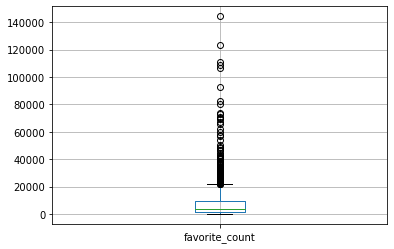

In [168]:
tweeter_final_df[['favorite_count']].boxplot()

In [169]:
tweeter_final_df[tweeter_final_df['favorite_count']>140000]

tweet_id                                            jpg_url  \
1220  744234799360020481  https://pbs.twimg.com/ext_tw_video_thumb/74423...   

      img_num                  p1   p1_conf  p1_dog        p2   p2_conf  \
1220        1  Labrador_retriever  0.825333    True  ice_bear  0.044681   

      p2_dog       p3   p3_conf  p3_dog  retweet_count  favorite_count  \
1220   False  whippet  0.018442    True          70326          144227   

                     timestamp  \
1220 2016-06-18 18:26:18+00:00   

                                                 source  \
1220  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1220  Here's a doggo realizing you can stand in a po...                13   

      rating_denominator  name  doggo floofer pupper puppo  
1220                  10  None  doggo    None   None  None

In [172]:
tweeter_final_df.drop(tweeter_final_df[tweeter_final_df['favorite_count']>140000].index, inplace=True)

In [173]:
tweeter_final_df[tweeter_final_df['favorite_count']>140000]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, retweet_count, favorite_count, timestamp, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

the outlier has been deleted

In [349]:
import os
os.getcwd()

'C:\\Users\\fumbah\\Documents\\ALX_PROJECTS\\WeRateDogs_data_analyis_project'

<br><br> 
<h2 style ='color:magenta;text-align:center; text-transform:uppercase;'>Archiving Data<br><br> 

In [176]:
tweeter_final_df.to_csv('twitter_archive_master.csv')

In [316]:
df = pd.read_csv('twitter_archive_master.csv', sep=',')
df.sample()

Unnamed: 0            tweet_id  \
913        1124  727314416056803329   

                                             jpg_url  img_num          p1  \
913  https://pbs.twimg.com/media/Chfwmd9U4AQTf1b.jpg        2  toy_poodle   

      p1_conf  p1_dog                p2  p2_conf  p2_dog               p3  \
913  0.827469    True  miniature_poodle  0.16076    True  Tibetan_terrier   

      p3_conf  p3_dog  retweet_count  favorite_count  \
913  0.001731    True            670            3060   

                     timestamp  \
913  2016-05-03 01:50:44+00:00   

                                                source  \
913  <a href="http://twitter.com/download/iphone" r...   

                                                  text  rating_numerator  \
913  This pupper was about to explain where that di...                11   

     rating_denominator  name doggo floofer  pupper puppo  
913                  10  None  None    None  pupper  None

<br><br> 
<h2 style ='color:magenta;text-align:center; text-transform:uppercase;'>analysis and data visualisation<br><br> 

In [317]:
df.head()

Unnamed: 0            tweet_id  \
0           0  666020888022790149   
1           1  666029285002620928   
2           2  666033412701032449   
3           3  666044226329800704   
4           4  666049248165822465   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                       p1   p1_conf  p1_dog                  p2   p2_conf  \
0  Welsh_springer_spaniel  0.465074    True              collie  0.156665   
1                 redbone  0.506826    True  miniature_pinscher  0.074192   
2         German_shepherd  0.596461    True            malinois  0.138584   
3     Rhodesian_ridgeback  0.408143    True             redbone  0.360687   
4      miniature_pinscher  0.560311    True          Rottweiler  0.243682   

   p2_dog                   p3   p3_conf  p3_dog  retweet_count  \
0    True    Shetland_sheepdog  0.061428    True            419   
1    True  Rhodesian_ridgeback  0.072010    True             39   
2    True           bloodhound  0.116197    True             36   
3    True   miniature_pinscher  0.222752    True            115   
4    True             Doberman  0.154629    True             36   

   favorite_count                  timestamp  \
0            2281  2015-11-15 22:32:08+00:00   
1             112  2015-11-15 23:05:30+00:00   
2             100  2015-11-15 23:21:54+00:00   
3             246  2015-11-16 00:04:52+00:00   
4              88  2015-11-16 00:24:50+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  Here we have a Japanese Irish Setter. Lost eye...                 8   
1  This is a western brown Mitsubishi terrier. Up...                 7   
2  Here is a very happy pup. Big fan of well-main...                 9   
3  This is a purebred Piers Morgan. Loves to Netf...                 6   
4  Here we have a 1949 1st generation vulpix. Enj...                 5   

   rating_denominator     name doggo floofer pupper puppo  
0                  10     None  None    None   None  None  
1                  10        a  None    None   None  None  
2                  10        a  None    None   None  None  
3                  10        a  None    None   None  None  
4                  10  vulpix.  None    None   None  None

<h3 style = "color:magenta">we are going to analysis:</h3>


##   01- what is the proportion of dogs stages in these data set
##   02- which dog is widely owned by the population in these data set
##   03- Which dog type recieved the most favourites

<h3 style = "color:magenta">01- what is the proportion of dogs stages in these data set</h3>

this question, we will have to find the count of each dog stage in the data set, devide by the total number of dogs in the data set and we will represent this better with a pie chart

In [ ]:
let start by getting a list of the dog stages and tweet id

let us initialise a dictionary to hold the counts of our dog stages 

In [225]:
dog_stage_dict = dict()

In [184]:
df[['tweet_id','text','name', 'doggo', 'pupper', 'puppo', 'floofer']]

tweet_id                                               text  \
0     666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   
1     666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2     666033412701032449  Here is a very happy pup. Big fan of well-main...   
3     666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
4     666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
5     666050758794694657  This is a truly beautiful English Wilson Staff...   
6     666055525042405380  Here is a Siberian heavily armored polar bear ...   
7     666057090499244032  My oh my. This is a rare blond Canadian terrie...   
8     666058600524156928  Here is the Rand Paul of retrievers folks! He'...   
9     666063827256086533  This is the happiest dog you will ever see. Ve...   
10    666071193221509120  Here we have a northern speckled Rhododendron....   
11    666073100786774016  Let's hope this flight isn't Malaysian (lol). ...   
12    666082916733198337  Here we have a well-established sunblockerspan...   
13    666094000022159362  This appears to be a Mongolian Presbyterian mi...   
14    666099513787052032  Can stand on stump for what seems like a while...   
15    666102155909144576  Oh my. Here you are seeing an Adobe Setter giv...   
16    666273097616637952     Can take selfies 11/10 https://t.co/ws2AMaNwPW   
17    666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   
18    666337882303524864  This is an extremely rare horned Parthenon. No...   
19    666345417576210432  Look at this jokester thinking seat belt laws ...   
20    666353288456101888  Here we have a mixed Asiago from the Galápagos...   
21    666373753744588802  Those are sunglasses and a jean jacket. 11/10 ...   
22    666396247373291520  Oh goodness. A super rare northeast Qdoba kang...   
23    666407126856765440  This is a southern Vesuvius bumblegruff. Can d...   
24    666418789513326592  This is Walter. He is an Alaskan Terrapin. Lov...   
25    666421158376562688  *internally screaming* 12/10 https://t.co/YMcr...   
26    666428276349472768  Here we have an Austrian Pulitzer. Collectors ...   
27    666430724426358785  Oh boy what a pup! Sunglasses take this one to...   
28    666435652385423360  "Can you behave? You're ruining my wedding day...   
29    666437273139982337  Here we see a lone northeastern Cumberbatch. H...   
30    666447344410484738  This is Scout. She is a black Downton Abbey. I...   
31    666454714377183233  I'll name the dogs from now on. This is Kreggo...   
32    666644823164719104  This is Jimothy. He is a Botwanian Gouda. Can ...   
33    666649482315059201  Cool dog. Enjoys couch. Low monotone bark. Ver...   
34    666691418707132416  This is Christoper. He is a spotted Penne. Can...   
35    666701168228331520  This is a golden Buckminsterfullerene named Jo...   
36    666739327293083650  This is Lugan. He is a Bohemian Rhapsody. Very...   
37    666776908487630848  This is Josep. He is a Rye Manganese mix. Can ...   
38    666781792255496192  This is a purebred Bacardi named Octaviath. Ca...   
39    666804364988780544  This is Jockson. He is a Pinnacle Sagittarius....   
40    666817836334096384  This is Jeph. He is a German Boston Shuttlecoc...   
41    666826780179869698  12/10 simply brilliant pup https://t.co/V6ZzG4...   
42    666835007768551424  These are Peruvian Feldspars. Their names are ...   
43    666996132027977728  This is Carll. He wants to be a donkey. But al...   
44    667044094246576128            12/10 gimme now https://t.co/QZAnwgnOMB   
45    667062181243039745  This is Keet. He is a Floridian Amukamara. Abs...   
46    667073648344346624  Here is Dave. He is actually just a skinny leg...   
47    667090893657276420  This is Clybe. He is an Anemone Valdez. One ea...   
48    667119796878725120  This is Gabe. He is a southern Baklava. Gabe h...   
49    667138269671505920  Extremely intelligent dog here. Has lear

In [216]:
doggo = df.groupby('doggo').count()
doggo

Unnamed: 0  tweet_id  jpg_url  img_num    p1  p1_conf  p1_dog    p2  \
doggo                                                                        
None         1614      1614     1614     1614  1614     1614    1614  1614   
doggo          63        63       63       63    63       63      63    63   

       p2_conf  p2_dog    p3  p3_conf  p3_dog  retweet_count  favorite_count  \
doggo                                                                          
None      1614    1614  1614     1614    1614           1614            1614   
doggo       63      63    63       63      63             63              63   

       timestamp  source  text  rating_numerator  rating_denominator  name  \
doggo                                                                        
None        1614    1614  1614              1614                1614  1614   
doggo         63      63    63                63                  63    63   

       floofer  pupper  puppo  
doggo                          
None      1614    1614   1614  
doggo       63      63     63

In [227]:
dog_stage_dict['doggo'] = list(doggo['pupper'])[1]
dog_stage_dict

{'doggo': 63}

In [200]:
pupper = df.groupby('pupper').count()
pupper

Unnamed: 0  tweet_id  jpg_url  img_num    p1  p1_conf  p1_dog    p2  \
pupper                                                                        
None          1501      1501     1501     1501  1501     1501    1501  1501   
pupper         176       176      176      176   176      176     176   176   

        p2_conf  p2_dog    p3  p3_conf  p3_dog  retweet_count  favorite_count  \
pupper                                                                          
None       1501    1501  1501     1501    1501           1501            1501   
pupper      176     176   176      176     176            176             176   

        timestamp  source  text  rating_numerator  rating_denominator  name  \
pupper                                                                        
None         1501    1501  1501              1501                1501  1501   
pupper        176     176   176               176                 176   176   

        doggo  floofer  puppo  
pupper                         
None     1501     1501   1501  
pupper    176      176    176

In [230]:
dog_stage_dict['pupper'] = list(pupper['doggo'])[1]
dog_stage_dict

{'doggo': 63, 'pupper': 176}

In [201]:
puppo = df.groupby('puppo').count()
puppo

Unnamed: 0  tweet_id  jpg_url  img_num    p1  p1_conf  p1_dog    p2  \
puppo                                                                        
None         1655      1655     1655     1655  1655     1655    1655  1655   
puppo          22        22       22       22    22       22      22    22   

       p2_conf  p2_dog    p3  p3_conf  p3_dog  retweet_count  favorite_count  \
puppo                                                                          
None      1655    1655  1655     1655    1655           1655            1655   
puppo       22      22    22       22      22             22              22   

       timestamp  source  text  rating_numerator  rating_denominator  name  \
puppo                                                                        
None        1655    1655  1655              1655                1655  1655   
puppo         22      22    22                22                  22    22   

       doggo  floofer  pupper  
puppo                          
None    1655     1655    1655  
puppo     22       22      22

In [231]:
dog_stage_dict['puppo'] = list(puppo['doggo'])[1]
dog_stage_dict

{'doggo': 63, 'pupper': 176, 'puppo': 9}

In [232]:
floofer = df.groupby('floofer').count()
floofer

Unnamed: 0  tweet_id  jpg_url  img_num    p1  p1_conf  p1_dog    p2  \
floofer                                                                        
None           1668      1668     1668     1668  1668     1668    1668  1668   
floofer           9         9        9        9     9        9       9     9   

         p2_conf  p2_dog    p3  p3_conf  p3_dog  retweet_count  \
floofer                                                          
None        1668    1668  1668     1668    1668           1668   
floofer        9       9     9        9       9              9   

         favorite_count  timestamp  source  text  rating_numerator  \
floofer                                                              
None               1668       1668    1668  1668              1668   
floofer               9          9       9     9                 9   

         rating_denominator  name  doggo  pupper  puppo  
floofer                                                  
None                   1668  1668   1668    1668   1668  
floofer                   9     9      9       9      9

In [233]:
dog_stage_dict['floofer'] = list(floofer['doggo'])[1]
dog_stage_dict

{'doggo': 63, 'pupper': 176, 'puppo': 9, 'floofer': 9}

In [257]:
Total_dog_stage = sum(list(dog_stage_dict.values()))
Total_dog_stage

257

we are going to iterate through the dictionary and calculate the proporttions of each of the dog stages in the data set

In [264]:
for key, value in dog_stage_dict.items():
    dog_stage_dict[key] = (value * 100)/Total_dog_stage

In [265]:
dog_stage_dict

{'doggo': 24.513618677042803,
 'pupper': 68.48249027237354,
 'puppo': 3.501945525291829,
 'floofer': 3.501945525291829}

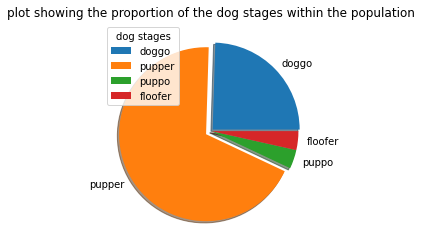

In [322]:
plt.pie(dog_stage_dict.values(), labels=dog_stage_dict.keys(), explode = np.array(list(dog_stage_dict.values()))/1000, shadow=True)
plt.title('plot showing the proportion of the dog stages within the population')
plt.legend(title = "dog stages")

<h3 style = "color:magenta">which dog is largely owned by the population in these data set</h3>

the dog that is widely owned by the tweeters is the dog that appears most frequently in the the twweets, we can get this dog by grouping the dataset on the best best prediction( P1)
and then getting the max value of the data set

In [318]:
dogs_kinds = df.groupby('p1', as_index =True).count()
dogs_kinds

Unnamed: 0  tweet_id  jpg_url  img_num  \
p1                                                                       
Afghan_hound                             3         3        3        3   
African_hunting_dog                      1         1        1        1   
Airedale                                12        12       12       12   
American_Staffordshire_terrier          12        12       12       12   
Angora                                   1         1        1        1   
Appenzeller                              2         2        2        2   
Arabian_camel                            1         1        1        1   
Arctic_fox                               3         3        3        3   
Australian_terrier                       2         2        2        2   
Bedlington_terrier                       5         5        5        5   
Bernese_mountain_dog                    10        10       10       10   
Blenheim_spaniel                        10        10       10       10   
Border_collie                           12        12       12       12   
Border_terrier                           7         7        7        7   
Boston_bull                              9         9        9        9   
Brabancon_griffon                        3         3        3        3   
Brittany_spaniel                         7         7        7        7   
Cardigan                                17        17       17       17   
Chesapeake_Bay_retriever                23        23       23       23   
Chihuahua                               79        79       79       79   
Dandie_Dinmont                           6         6        6        6   
Doberman                                 8         8        8        8   
Egyptian_cat                             1         1        1        1   
English_setter                           7         7        7        7   
English_springer                         9         9        9        9   
EntleBucher                              1         1        1        1   
Eskimo_dog                              18        18       18       18   
French_bulldog                          25        25       25       25   
German_shepherd                         20        20       20       20   
German_short-haired_pointer              7         7        7        7   
Gordon_setter                            4         4        4        4   
Great_Dane                               9         9        9        9   
Great_Pyrenees                          14        14       14       14   
Greater_Swiss_Mountain_dog               3         3        3        3   
Ibizan_hound                             3         3        3        3   
Irish_setter                             4         4        4        4   
Irish_terrier                            5         5        5        5   
Irish_water_spaniel                      3         3        3        3   
Italian_greyhound                       16        16       16       16   
Japanese_spaniel                         1         1        1        1   
Labrador_retriever                      91        91       91       91   
Lakeland_terrier                        16        16       16       16   
Leonberg                                 3         3        3        3   
Lhasa                                    5         5        5        5   
Loafer                                   1         1        1        1   
Maltese_dog                             18        18       18       18   
Mexican_hairless                         4         4        4        4   
Newfoundland                             5         5        5        5   
Norfolk_terrier                          7         7        7        7   
Norwegian_elkhound                       7         7        7        7   
Norwich_terrier                          4         4        4        4   
Old_English_sheepdog                    12        12       12       12   
Pekinese                            

In [307]:
dogs_kinds.max()

Unnamed: 0            139
tweet_id              139
jpg_url               139
img_num               139
p1_conf               139
p1_dog                139
p2                    139
p2_conf               139
p2_dog                139
p3                    139
p3_conf               139
p3_dog                139
retweet_count         139
favorite_count        139
timestamp             139
source                139
text                  139
rating_numerator      139
rating_denominator    139
name                  139
doggo                 139
floofer               139
pupper                139
puppo                 139
dtype: int64

the dog that appears most frequently is the dog with 139 max count,
 
    let us get this dog by filtering the data set with this max_
     count

In [319]:
df2 = dogs_kinds[dogs_kinds['tweet_id']==139]
df2

Unnamed: 0  tweet_id  jpg_url  img_num  p1_conf  p1_dog  \
p1                                                                          
golden_retriever         139       139      139      139      139     139   

                   p2  p2_conf  p2_dog   p3  p3_conf  p3_dog  retweet_count  \
p1                                                                            
golden_retriever  139      139     139  139      139     139            139   

                  favorite_count  timestamp  source  text  rating_numerator  \
p1                                                                            
golden_retriever             139        139     139   139               139   

                  rating_denominator  name  doggo  floofer  pupper  puppo  
p1                                                                         
golden_retriever                 139   139    139      139     139    139

<h3 style = "color:magenta">This shows that the golden_retriever is widely distributed in the pupulation of the data set</h3>



<h3 style = "color:magenta">Which dog type recieved the most favourites</h3>


In [ ]:
we will get the dog stage with the highest favourite count

we need to group by dog type, then by favourite count

In [327]:
dog_by_fav_cnt = df.groupby(['p1','favorite_count'], as_index=False).count()
dog_by_fav_cnt

p1  favorite_count  Unnamed: 0  tweet_id  \
0                       Afghan_hound            5979           1         1   
1                       Afghan_hound           14711           1         1   
2                       Afghan_hound           23280           1         1   
3                African_hunting_dog            1454           1         1   
4                           Airedale             183           1         1   
5                           Airedale             887           1         1   
6                           Airedale            1168           1         1   
7                           Airedale            1273           1         1   
8                           Airedale            2009           1         1   
9                           Airedale            2182           1         1   
10                          Airedale            2925           1         1   
11                          Airedale            3154           1         1   
12                          Airedale            4330           1         1   
13                          Airedale            5957           1         1   
14                          Airedale           10718           1         1   
15                          Airedale           18920           1         1   
16    American_Staffordshire_terrier             403           1         1   
17    American_Staffordshire_terrier            1051           1         1   
18    American_Staffordshire_terrier            2048           1         1   
19    American_Staffordshire_terrier            2385           1         1   
20    American_Staffordshire_terrier            2772           1         1   
21    American_Staffordshire_terrier            4452           1         1   
22    American_Staffordshire_terrier            5002           1         1   
23    American_Staffordshire_terrier            6303           1         1   
24    American_Staffordshire_terrier            6969           1         1   
25    American_Staffordshire_terrier            9750           1         1   
26    American_Staffordshire_terrier           10919           1         1   
27    American_Staffordshire_terrier           11169           1         1   
28                            Angora           80289           1         1   
29                       Appenzeller            2166           1         1   
30                       Appenzeller           10328           1         1   
31                     Arabian_camel           70310           1         1   
32                        Arctic_fox             394           1         1   
33                        Arctic_fox             489           1         1   
34                        Arctic_fox            1059           1         1   
35                Australian_terrier            1877           1         1   
36                Australian_terrier           17175           1         1   
37                Bedlington_terrier            3582           1         1   
38                Bedlington_terrier            3958           1         1   
39                Bedlington_terrier           11829           1         1   
40                Bedlington_terrier           14998           1         1   
41                Bedlington_terrier           21191           1         1   
42              Bernese_mountain_dog             115           1         1   
43              Bernese_mountain_dog            1258           1         1   
44              Bernese_mountain_dog            2281           1         1   
45              Bernese_mountain_dog            2431           1         1   
46              Bernese_mountain_dog            3773           1         1   
47              Bernese_mountain_dog            4603           1         1   
48              Bernese_mountain_dog            5002           1         1   
49              Bernese_mountain_dog            6059           1         1   
50              Bernese_mountain_dog            7778    

In [333]:
df = dog_by_fav_cnt[['p1', 'favorite_count']]
df

p1  favorite_count
0                       Afghan_hound            5979
1                       Afghan_hound           14711
2                       Afghan_hound           23280
3                African_hunting_dog            1454
4                           Airedale             183
5                           Airedale             887
6                           Airedale            1168
7                           Airedale            1273
8                           Airedale            2009
9                           Airedale            2182
10                          Airedale            2925
11                          Airedale            3154
12                          Airedale            4330
13                          Airedale            5957
14                          Airedale           10718
15                          Airedale           18920
16    American_Staffordshire_terrier             403
17    American_Staffordshire_terrier            1051
18    American_Staffordshire_terrier            2048
19    American_Staffordshire_terrier            2385
20    American_Staffordshire_terrier            2772
21    American_Staffordshire_terrier            4452
22    American_Staffordshire_terrier            5002
23    American_Staffordshire_terrier            6303
24    American_Staffordshire_terrier            6969
25    American_Staffordshire_terrier            9750
26    American_Staffordshire_terrier           10919
27    American_Staffordshire_terrier           11169
28                            Angora           80289
29                       Appenzeller            2166
30                       Appenzeller           10328
31                     Arabian_camel           70310
32                        Arctic_fox             394
33                        Arctic_fox             489
34                        Arctic_fox            1059
35                Australian_terrier            1877
36                Australian_terrier           17175
37                Bedlington_terrier            3582
38                Bedlington_terrier            3958
39                Bedlington_terrier           11829
40                Bedlington_terrier           14998
41                Bedlington_terrier           21191
42              Bernese_mountain_dog             115
43              Bernese_mountain_dog            1258
44              Bernese_mountain_dog            2281
45              Bernese_mountain_dog            2431
46              Bernese_mountain_dog            3773
47              Bernese_mountain_dog            4603
48              Bernese_mountain_dog            5002
49              Bernese_mountain_dog            6059
50              Bernese_mountain_dog            7778
51              Bernese_mountain_dog           24608
52                  Blenheim_spaniel             272
53                  Blenheim_spaniel             574
54                  Blenheim_spaniel            1495
55                  Blenheim_spaniel            2577
56                  Blenheim_spaniel            3561
57                  Blenheim_spaniel            4974
58                  Blenheim_spaniel            9351
59                  Blenheim_spaniel           27023
60                  Blenheim_spaniel           28490
61                     Border_collie             639
62                     Border_collie             992
63                     Border_collie            1761
64                     Border_collie            2445
65                     Border_collie            2717
66                     Border_collie            2962
67                     Border_collie            3971
68                     Border_collie            4255
69                     Border_collie            7946
70                     Border_collie            9277
71                     Border_collie           24510
72                     Border_collie           30160
73                    Border_terrier            1566
74                    Border_terrier            2055
75    

In [340]:
df3 = df.groupby('p1').sum()

In [343]:
df_max=df3[ df3['favorite_count'] == df3['favorite_count'].max() ]
df_max

favorite_count
p1                              
golden_retriever         1447097


<h3 style = "color:magenta"> golden_retriever recieved the most favourites of 1447097 counts in total</h3>
